# QOL

In [1]:
save = False

# General Code

error_L2  = 0.011179820405625979
error_max = 0.007492919075748727


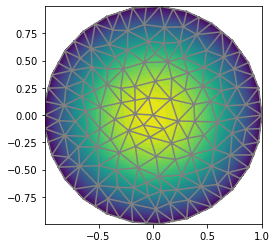

In [2]:
"""This script program solves Poisson's equation

    - div grad u(x, y) = f(x, y)

on the unit cricle with source f given by

    f(x, y) = 4

and boundary conditions given by

    u(x, y) = 0        
"""

from __future__ import print_function
from fenics import *
from mshr import *
import numpy as np
import matplotlib.pyplot as plt

# Create mesh 
domain = Circle(Point(0, 0), 1) 
mesh = generate_mesh(domain, 8)

# Define function space
V_h = FunctionSpace(mesh, 'P', 1)

#############################################
# Define boundary conditions
#############################################

# define overall expression
u_D = Expression('1 - x[0]*x[0] - x[1]*x[1]', degree=3)

# define where the expression will be evaluated
def boundary(x, on_boundary):
    return on_boundary

# define the BC using the space and the function above
bc = DirichletBC(V_h, u_D, boundary)

#############################################
# Define variational problem
#############################################

# define trial space
u = TrialFunction(V_h)
  
# define test space
v = TestFunction(V_h)

# define right-hand side
f = 4; rhs = f*v*dx

# define the bilinear form
a = dot(grad(u),grad(v))*dx

# define the linear form
L = rhs

#############################################
# Compute the solution 
#############################################

# define function where we will store the solution
u_h = Function(V_h)

# solve the variational problem
solve(a == L, u_h, bc)

#############################################
# Plot and compute error
#############################################

# Plot solution and mesh
plot(u_h)
plot(mesh)

# Compute error in L2 norm
error_L2 = errornorm(u_D, u_h, 'L2')

# Compute maximum error at vertices
vertex_values_u_D = u_D.compute_vertex_values(mesh)
vertex_values_u = u_h.compute_vertex_values(mesh)
error_max = np.max(np.abs(vertex_values_u_D - vertex_values_u))

# Print errors
print('error_L2  =', error_L2)
print('error_max =', error_max)

# Hold plot
if save:
    plt.savefig("Ac")
plt.show()

# Increasingly Fine Meshes

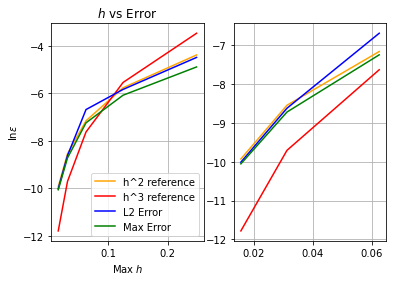

In [3]:
data=[]
for resolution in 2**np.array(range(3,8)):
    # Create mesh 
    domain = Circle(Point(0, 0), 1) 
    mesh = generate_mesh(domain, resolution)

    # Define function space
    V_h = FunctionSpace(mesh, 'P', 1)

    # Boundary Conditions
    u_D = Expression('1 - x[0]*x[0] - x[1]*x[1]', degree=3)
    def boundary(x, on_boundary):
        return on_boundary
    bc = DirichletBC(V_h, u_D, boundary)

    # Define Problem
    u = TrialFunction(V_h)
    v = TestFunction(V_h)
    a = dot(grad(u),grad(v))*dx
    L = 4*v*dx

    # Solve
    u_h = Function(V_h)
    solve(a == L, u_h, bc)

    # Compute Error in L2 Norm
    error_L2 = errornorm(u_D, u_h, 'L2')

    # Compute Maximal Error
    vertex_values_u_D = u_D.compute_vertex_values(mesh)
    vertex_values_u = u_h.compute_vertex_values(mesh)
    error_max = np.max(np.abs(vertex_values_u_D - vertex_values_u))
    
    # Add Data
    data.append([mesh.hmax(),error_L2,error_max])

# Plot Results
data = np.array(data)

fig,pl = plt.subplots(1,2)
for i in range(len(pl)):
    pl[i].plot(data[:,0],np.log(2e-1*data[:,0]**2),label="h^2 reference",color="orange")
    pl[i].plot(data[:,0],np.log(2*data[:,0]**3),label="h^3 reference",color="red")
    pl[i].plot(data[:,0],np.log(data[:,1]),label="L2 Error",color="Blue")
    pl[i].plot(data[:,0],np.log(data[:,2]),label="Max Error",color="Green")
    pl[i].grid()
    if i == 0:
        pl[i].set(xlabel="Max $h$", ylabel="$\ln \epsilon$", title="$h$ vs Error")
        pl[i].legend()
    data = data[int(len(data)/2):]

if save:
    fig.savefig("Ad.png")
plt.show()

# Increasingly Fine Meshes (Quadratic)

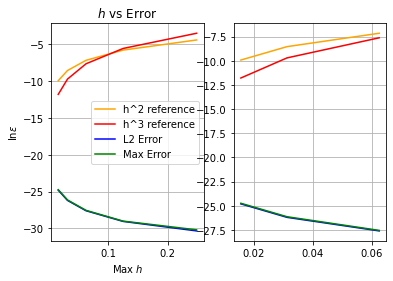

In [4]:
data=[]
for resolution in 2**np.array(range(3,8)):
    # Create mesh 
    domain = Circle(Point(0, 0), 1) 
    mesh = generate_mesh(domain, resolution)

    # Define function space
    V_h = FunctionSpace(mesh, 'P', 2)

    # Boundary Conditions
    u_D = Expression('1 - x[0]*x[0] - x[1]*x[1]', degree=3)
    def boundary(x, on_boundary):
        return on_boundary
    bc = DirichletBC(V_h, u_D, boundary)

    # Define Problem
    u = TrialFunction(V_h)
    v = TestFunction(V_h)
    a = dot(grad(u),grad(v))*dx
    L = 4*v*dx

    # Solve
    u_h = Function(V_h)
    solve(a == L, u_h, bc)

    # Compute Error in L2 Norm
    error_L2 = errornorm(u_D, u_h, 'L2')

    # Compute Maximal Error
    vertex_values_u_D = u_D.compute_vertex_values(mesh)
    vertex_values_u = u_h.compute_vertex_values(mesh)
    error_max = np.max(np.abs(vertex_values_u_D - vertex_values_u))
    
    # Add Data
    # https://bitbucket.org/fenics-project/dolfin/issues/664/cell-diameter-computed-incorrectly-hmax
    data.append([mesh.hmax(),error_L2,error_max])

# Plot Results
data = np.array(data)

#
fig,pl = plt.subplots(1,2)
for i in range(len(pl)):
    pl[i].plot(data[:,0],np.log(2e-1*data[:,0]**2),label="h^2 reference",color="orange")
    pl[i].plot(data[:,0],np.log(2*data[:,0]**3),label="h^3 reference",color="red")
    pl[i].plot(data[:,0],np.log(data[:,1]),label="L2 Error",color="Blue")
    pl[i].plot(data[:,0],np.log(data[:,2]),label="Max Error",color="Green")
    pl[i].grid()
    if i == 0:
        pl[i].set(xlabel="Max $h$", ylabel="$\ln \epsilon$", title="$h$ vs Error")
        pl[i].legend()
    data = data[int(len(data)/2):]

if save:
    fig.savefig("Ae.png")
plt.show()